In [1]:
import pandas as pd
import pylab as plt
import numpy as np

**Aşağıda bağlantısı bulunan csv dosyasını pandas frame olarak açın?**

In [2]:
data="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
#df = ...
df=pd.read_csv(data)
#df.head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Bu dosya içerisindeki tüm genel bilgileri (sütun tipleri) gösterin?**

In [3]:
#df....
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Bu dosya içerisindeki tüm istatistiksel bilgileri gösterin?**

In [5]:
#df...
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Veri setinde bulunan her sutundaki benzersiz verilerin sayisini goruntuleyiniz**

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Cinsiyet ve yolcu sinifi sutunlarina ait olan benzersiz verilerin sayisini goruntuleyiniz**

In [7]:
df[["Pclass","Sex"]].nunique()

Pclass    3
Sex       2
dtype: int64

### Bunlar cevaplayacağımız soru kategorileri:
* Hangi yolcu sınıfı hayatta kalanların maksimum sayısına sahip?
* Farklı sınıflar arasında hayatta kalanların cinsiyete göre dağılımı nedir?
* Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasında dağılımı nedir?
* Farklı yaş grupları arasında hayatta kalma yüzdesi nedir?

In [8]:
# Age,Fare ve embarked için eksik olan verileri inceleyin 
df[df.Age.isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [9]:
# Age değeri eksik olmayan verileri seçmek için
df_temp=df[df.Age.notnull()]
df_temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Age ve Fare  eksik olan verileri  ortanca sütun değerleri ile doldurun Embarked  için ise S ile doldurun
#df[...]=df.Age...(df.Age...)
#df[...]=df.Fare...(...)
#df[...]=df.Embarked...(...)
df["Age"]=df.Age.fillna(df.Age.median())
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
#yasi 35 ten buyuk yolcularin adlarini bulunuz
adult_names=df.loc[df["Age"]>35,"Name"]
adult_names

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
13                           Andersson, Mr. Anders Johan
15                      Hewlett, Mrs. (Mary D Kingcome) 
                             ...                        
865                             Bystrom, Mrs. (Karolina)
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
873                          Vander Cruyssen, Mr. Victor
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
885                 Rice, Mrs. William (Margaret Norton)
Name: Name, Length: 217, dtype: object

In [13]:
#cinsiyet dağılımı için
df_temp.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

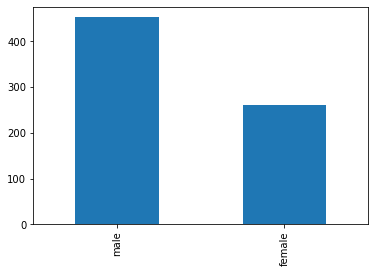

In [14]:
# Bütün yolcuların kadın/erkek dağılımı barchart olarak görmek için 
df_temp.Sex.value_counts().plot(kind="bar");

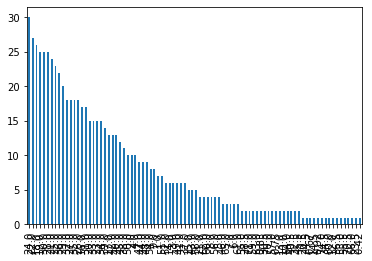

In [16]:
# Bütün yolcuların yaş değerini barchart olarak görmek için
df_temp.Age.value_counts().plot(kind="bar");

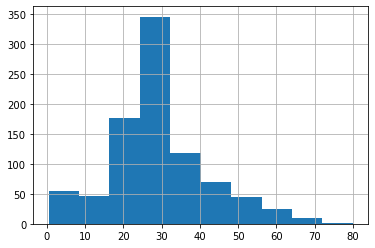

In [17]:
# Age gibi büyük bir aralıkta değer olan değişkenler için histogram grafiği daha anlamlı olup bunu çizmek için
df.Age.hist(bins=10);

## Hangi yolcu sınıfı hayatta kalanların maksimum sayısına sahip?

In [19]:
# Yolculardan kurtulanları seçmek için
df[df.Survived==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
# Bütün  kurtulanların bilet sınıflarına göre sayılarını görmek için
#df[...].groupby(...).count()
df[df.Survived==1].groupby(["Pclass"]).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,136,136,136,136,136,136,136,136,136,117,134
2,87,87,87,87,87,87,87,87,87,13,87
3,119,119,119,119,119,119,119,119,119,6,119


In [26]:
# kurtulan yolcuların  bilet sınıflarına göre sayılarını görmek için
#df[...].groupby(...).Survived....
df[df.Survived==1].groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
2       1            87
3       1           119
Name: Survived, dtype: int64

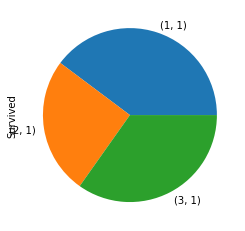

In [29]:
# yolcuların kurtulanların bilet sınıflarına göre sayılarını dağılımını çizmek için (1. sorunun cevabı)
#df[...].groupby(...).Survived....
df[df.Survived==1].groupby("Pclass").Survived.value_counts().plot(kind="pie");

In [30]:
# Kurtulan yolcuların bilet sınıflarına göre ödedikleri üçretlerin ortalaması için 
#df[...].groupby(...)....
df[df.Survived==1].groupby("Pclass").Fare.mean()

Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64

In [32]:
# Bütün yolcuların bilet sınıflarına göre ödedikleri üçretlerin ortalaması için
#df.groupby(...)....
df.groupby("Pclass").Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [33]:
# Hayata kalan yolcuların bilet sınıflarına göre cinsiyet sayılarını görmek için
#df[..].groupby(...)....
df[df.Survived==1].groupby("Pclass").Sex.value_counts()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass,Sex'>

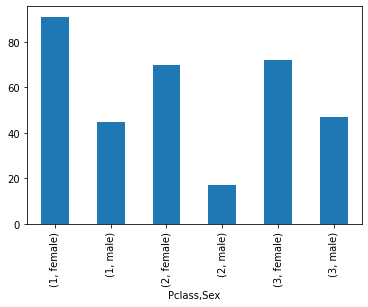

In [34]:
# Hayata kalan yolcuların bilet sınıflarına göre cinsiyet dağılımlarını barchart olarak çizmek için (2. sorunu cevabı)
df[df.Survived==1].groupby("Pclass").Sex.value_counts().plot(kind="bar")

## Farklı sınıflar arasında hayatta kalanların cinsiyete göre dağılımı nedir?

In [36]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişileri seçmek için
#df[(...) & ((...) | (...))].head()
df[(df.Survived==0)&((df.SibSp>0) | (df.Parch>0))].head()  #Parch:parent-child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S


In [38]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki dağılımı için
#non_survivors =df[(...) & ((...) | (...))].groupby(...).Survived.count()
non_survivors=df[(df.Survived==0)&((df.SibSp>0) | (df.Parch>0))].groupby("Pclass").Survived.count()
non_survivors

Pclass
1     29
2     29
3    117
Name: Survived, dtype: int64

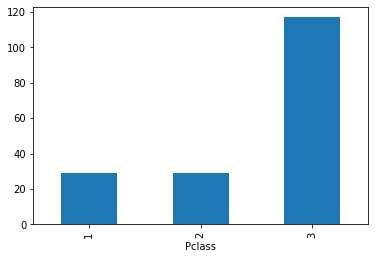

In [40]:
# Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki dağılımını çizmek için (3. soru)
#non_survivors....)
non_survivors.plot(kind="bar");

In [41]:
# Sınfa göre hayatta kalamayanların toplam sayısı
#total_survivor = df[...].groupby(...).PassengerId.count()
total_survivor=df[df.Survived==0].groupby("Pclass").PassengerId.count()

In [42]:
#total_survivor
total_survivor

Pclass
1     80
2     97
3    372
Name: PassengerId, dtype: int64

In [44]:
# # Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki oransal dağılımı için 
#percentange = ...
percentange=non_survivors/total_survivor
percentange

Pclass
1    0.362500
2    0.298969
3    0.314516
dtype: float64

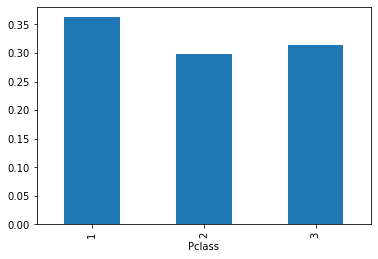

In [46]:
# # Gemideki kurtulamayan ve dışarda akrabaları olan kişilerin sınıflar arasındaki oransal dağılımı çizmek için 
percentange.plot(kind="bar");

## Farklı yaş grupları arasında hayatta kalma yüzdesi nedir?

In [48]:
# yaş aralıklarını tanımlamak için
age_bin = [0,18,25,40,60,100]

In [49]:
# yaş aralıklarını bir seri olarak olşturur
pd.cut(df.Age,bins=age_bin).head()

0    (18, 25]
1    (25, 40]
2    (25, 40]
3    (25, 40]
4    (25, 40]
Name: Age, dtype: category
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 40] < (40, 60] < (60, 100]]

In [51]:
# bu yaş aralık serisini yeni bir sütun olarak ekler
df["Agebin"]=pd.cut(df.Age,bins=age_bin)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 40]"


In [53]:
# null verileri çıkarmak için !dropna da kullanilabilir.
df_temp=df[df.notnull()]
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 40]"


In [54]:
# Hayata kalan kişilerin yaş aralıklarına göre sayısını bulmak için
df_temp[df.Survived==1].groupby("Agebin").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Agebin,,,,,,,,,,,,
"(0, 18]",70,70,70,70,70,70,70,70,70,70,20,70
"(18, 25]",54,54,54,54,54,54,54,54,54,54,21,54
"(25, 40]",163,163,163,163,163,163,163,163,163,163,61,162
"(40, 60]",50,50,50,50,50,50,50,50,50,50,31,50
"(60, 100]",5,5,5,5,5,5,5,5,5,5,3,4


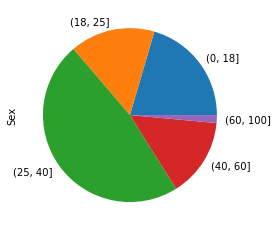

In [58]:
# Hayata kalan kişilerin yaş aralıklarına göre sayısını pie chart olarak çizmek için (4. sorunun cevabı)
df_temp[df.Survived==1].groupby("Agebin").Sex.count().plot(kind="pie");

*************************
**4- Veri setini 3 ayrı parçaya ayırınız ve sütuna göre bunları birleştiriniz**

"Survived", "Pclass","Name"

"Sex", "Age","SibSp"

"Parch", "Fare" sütunlarını referans alınız

In [59]:
#df1
#df2
#df3

**5-Soru ayrı bir veriseti üzerinden devam ediceğiz**

concat işlevi Bir DataFrame'den diğerine sütun veya satır eklemek için kullanabiliriz . Bunun nasıl çalıştığını görmek için verilerimizin iki alt kümesini alalım.

survey veri setini yükleyiniz

In [68]:
surveys_df=pd.read_csv("surveys.csv",keep_default_na=False,na_values=[""])
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [69]:
# Anket tablosunun ilk 10 satırını okuyun
survey_sub = surveys_df.head(10)

In [70]:
# Anket tablosunun  Son 10 satırı alın
survey_sub_last10 = surveys_df.tail(10)

In [72]:
# İkinci veri setini resetleyiniz. 
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# drop = Doğru seçeneği, eski dizin değerlerine sahip yeni dizin sütunu eklemekten kaçınır
survey_sub_last10

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,35540,12,31,2002,15,PB,F,26.0,23.0
1,35541,12,31,2002,15,PB,F,24.0,31.0
2,35542,12,31,2002,15,PB,F,26.0,29.0
3,35543,12,31,2002,15,PB,F,27.0,34.0
4,35544,12,31,2002,15,US,NaN,NaN,NaN
5,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,35547,12,31,2002,10,RM,F,15.0,14.0
8,35548,12,31,2002,7,DO,M,36.0,51.0
9,35549,12,31,2002,5,NaN,NaN,NaN,NaN


DataFrame'leri birleştirdiğimizde, ekseni belirtmemiz gerekir. axis=0  ikinci DataFrame'i ilkinin ALTINA yığmasını sağlar. ve sütun adlarının aynı olup olmadığını otomatik olarak algılar axis=1 ise ikinci DataFrame'deki sütunları birinci DataFrame'in SAĞINA yığınlar 

In [75]:
#verileri dikey ve yatay olarak birleştiriniz
vertical_stack=pd.concat([survey_sub,survey_sub_last10],axis=0)
vertical_stack

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


**6 -Join ile ilgili işemler yapalım**

In [77]:
# # Anket tablosunun ilk 10 satırını okuyun
survey_sub=surveys_df.head(10)
survey_sub

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [79]:
# Speciesveri setini yükleyelim
#species_sub = 
species_sub=pd.read_csv("speciesSubset.csv",keep_default_na=False,na_values=[""])
species_sub

,species_id,genus,species,taxa
0,DM,Dipodomys,merriami,Rodent
1,NL,Neotoma,albigula,Rodent
2,PE,Peromyscus,eremicus,Rodent


**iki verisetinin sütunlarını inceleyiniz**


In [80]:
species_sub.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

**iki verisetini innerjoin yani kesişim olarak merge ediniz**

In [81]:
merged_inner=pd.merge(left=survey_sub,right=species_sub,left_on="species_id",right_on="species_id")
merged_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


**sola doğru yani hem kesişim hemde birinci verisetine göre birleştirme yapınız**

In [82]:
merged_left=pd.merge(left=survey_sub,right=species_sub,left_on="species_id",right_on="species_id",how="left")
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN
